In [136]:
import json

import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

# For legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Read from JSON
with open('../data/open-fema/FEMA-Large-DR-4332-TX.json','r') as f:
    femaData = json.loads(f.read())
femaDf = pd.json_normalize(femaData['fema_open_api'])

In [140]:
print('There are {} records'.format(len(femaDf)))

There are 895512 records


In [4]:
# Describe Numeric Columns
femaDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
disasterNumber,895512.0,4332.000000,0.000000,4332.00,4332.000,4332.000,4332.0000,4332.00
householdComposition,895512.0,2.421019,1.622776,1.00,1.000,2.000,3.0000,26.00
grossIncome,745772.0,68004.426573,627843.637849,0.00,14400.000,30000.000,58000.0000,99999999.00
rpfvl,213427.0,8480.866057,11031.149028,0.00,534.720,4049.390,13263.7700,342300.76
waterLevel,584107.0,5.978857,13.438433,0.00,0.000,0.000,5.0000,660.00
foundationDamageAmount,7787.0,1738.952558,4506.644264,0.98,175.120,623.880,2000.8900,69302.80
roofDamageAmount,45487.0,399.528655,882.751178,0.65,44.460,123.340,370.5000,23670.00
rentalAssistanceAmount,143510.0,2286.958274,1503.847233,22.80,1594.000,1952.000,2666.0000,30749.77
repairAmount,87308.0,10153.255703,8320.570826,3.72,2612.405,9125.635,14828.7725,33300.00
replacementAmount,436.0,24136.151055,7212.120130,1761.46,16232.460,29370.700,30537.0000,33300.00


In [61]:
femaDf.head()

,disasterNumber,damagedCity,damagedStateAbbreviation,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,...,rentalResourceCity,rentalResourceStateAbbreviation,rentalResourceZipCode,primaryResidence,personalPropertyEligible,ppfvl,censusBlockId,censusYear,id,haAmount
0,4332,HOUSTON,TX,77033,1,NaN,False,Renter,House/Duplex,False,...,None,None,None,True,False,0.0,482013321001024,2017,5c12d6adf2238e6fe4fe92a2,NaN
1,4332,CORPUS CHRISTI,TX,78413,2,30000.0,False,Owner,House/Duplex,True,...,None,None,None,True,False,0.0,483550054092001,2017,5c12d6adf2238e6fe4fe929f,NaN
2,4332,WOODVILLE,TX,75979,2,45000.0,False,Owner,Mobile Home,True,...,None,None,None,True,False,0.0,484579502005051,2017,5c12d6adf2238e6fe4fe92a3,255.47
3,4332,HOUSTON,TX,77004,4,200000.0,False,Owner,House/Duplex,True,...,None,None,None,True,False,0.0,482013129002017,2017,5c12d6adf2238e6fe4fe92a0,NaN
4,4332,HOUSTON,TX,77036,1,6000.0,False,Renter,Apartment,False,...,None,None,None,True,False,0.0,482014334001003,2017,5c12d6adf2238e6fe4fe92a1,NaN


### Calculate aggregate haAmount

In [139]:
femaDf['rentalAssistanceAmount'].sum() + femaDf['replacementAmount'].sum() + femaDf['repairAmount'].sum()

1225185192.7600002

In [64]:
femaDf.columns.tolist()

['disasterNumber',
 'damagedCity',
 'damagedStateAbbreviation',
 'damagedZipCode',
 'householdComposition',
 'grossIncome',
 'specialNeeds',
 'ownRent',
 'residenceType',
 'homeOwnersInsurance',
 'floodInsurance',
 'inspected',
 'rpfvl',
 'habitabilityRepairsRequired',
 'destroyed',
 'waterLevel',
 'floodDamage',
 'foundationDamage',
 'foundationDamageAmount',
 'roofDamage',
 'roofDamageAmount',
 'tsaEligible',
 'tsaCheckedIn',
 'rentalAssistanceEligible',
 'rentalAssistanceAmount',
 'repairAssistanceEligible',
 'repairAmount',
 'replacementAssistanceEligible',
 'replacementAmount',
 'sbaEligible',
 'renterDamageLevel',
 'rentalAssistanceEndDate',
 'rentalResourceCity',
 'rentalResourceStateAbbreviation',
 'rentalResourceZipCode',
 'primaryResidence',
 'personalPropertyEligible',
 'ppfvl',
 'censusBlockId',
 'censusYear',
 'id',
 'haAmount']

### Visualize  columns related to insurance/inspections

In [121]:
fig = go.Figure(data=[go.Bar(x=['Home Insurance',  'Flood Insurance', 'Inspected'], 
                              y =[femaDf['homeOwnersInsurance'].sum(),
                                  femaDf['floodInsurance'].sum(), 
                                  femaDf['inspected'].sum()], 
                                  name='True', marker_color='indianred'),
                       go.Bar(x=['Home Insurance',  'Flood Insurance', 'Inspected'], 
                              y =[(~femaDf['homeOwnersInsurance']).sum(),
                                  (~femaDf['floodInsurance']).sum(), 
                                  (~femaDf['inspected']).sum()], 
                                  name='False', marker_color='lightsalmon')])
fig.update_layout(barmode='stack',   bargap=0.07, width=600, height=400)

### Visualize columns related to damage

In [122]:
fig = go.Figure(data=[go.Bar(x=['Flood Damage',  'Foundation Damage', 'Roof Damage', 'Repairs Required', 'Destroyed'], 
                              y =[femaDf['floodDamage'].sum(),
                                  femaDf['foundationDamage'].sum(), 
                                  femaDf['roofDamage'].sum(),
                                  femaDf['habitabilityRepairsRequired'].sum(),
                                  femaDf['destroyed'].sum()], 
                                  name='True', marker_color='indianred'),
                       go.Bar(x=['Flood Damage',  'Foundation Damage', 'Roof Damage', 'Repairs Required', 'Destroyed'], 
                              y =[(~femaDf['floodDamage']).sum(),
                                  (~femaDf['foundationDamage']).sum(), 
                                  (~femaDf['roofDamage']).sum(),
                                  femaDf['habitabilityRepairsRequired'].value_counts()[False],
                                  (~femaDf['destroyed']).sum()], 
                                  name='False', marker_color='lightsalmon')])
fig.update_layout(barmode='stack',   bargap=0.07, width=600, height=400)

### Visualize columns related to Eligibility


In [123]:
fig = go.Figure(data=[go.Bar(x=['TSA Eligible',  'Rental Assistance Eligible', 'Repair Assistance Eligible', 'Replacement Assistance Eligible', 'SBA Eligble', 'Personal Property Eligible'], 
                              y =[femaDf['tsaEligible'].sum(),
                                  femaDf['rentalAssistanceEligible'].sum(), 
                                  femaDf['repairAssistanceEligible'].sum(),
                                  femaDf['replacementAssistanceEligible'].sum(),
                                  femaDf['sbaEligible'].sum(),
                                  femaDf['personalPropertyEligible'].sum()], 
                                  name='True', marker_color='indianred'),
                       go.Bar(x=['TSA Eligible',  'Rental Assistance Eligible', 'Repair Assistance Eligible', 'Replacement Assistance Eligible', 'SBA Eligble', 'Personal Property Eligible'], 
                              y =[(~femaDf['tsaEligible']).sum(),
                                  (~femaDf['rentalAssistanceEligible']).sum(), 
                                  (~femaDf['repairAssistanceEligible']).sum(),
                                  (~femaDf['replacementAssistanceEligible']).sum(),
                                  (~femaDf['sbaEligible']).sum(),
                                  (~femaDf['personalPropertyEligible']).sum()], 
                                  name='False', marker_color='lightsalmon')])
fig.update_layout(barmode='stack',   bargap=0.07, width=600, height=400)

### Visualize Rent/Owned

In [124]:
fig = go.Figure(data=[go.Bar(x=['Renter', 'Owner', 'Unknown'], 
                             y=[femaDf['ownRent'].value_counts()['Renter'], 
                                femaDf['ownRent'].value_counts()['Owner'],
                                femaDf['ownRent'].value_counts()['Unknown']], 
                                marker_color='indianred')])
fig.update_layout(bargap=0.07, width=600, height=400)

### Visualize breakdown of payouts

In [125]:
fig = go.Figure(data=[go.Bar(y=['Rental Assistance Amount', 'Repair Assistance Amount', 'Replacement Assistance Amount'], 
                              x =[femaDf['rentalAssistanceAmount'].sum(), 
                                  femaDf['repairAmount'].sum(),
                                  femaDf['replacementAmount'].sum()], 
                                  name='True', marker_color='indianred')])
fig.update_traces(orientation='h', selector=dict(type='bar'))
fig.update_layout(bargap=0.07, width=1000, height=400)

### Visualize Registrations by Census Tract


In [126]:
# Load the tract shapefiles
census_tract_shp = gpd.read_file('../data/census-tract/shapefiles/cb_2017_48_tract_500k.shp')

# Make sure GEOID is type int64
census_tract_shp['GEOID'] = census_tract_shp['GEOID'].astype('int64')

In [127]:
print('There are {} census tracts in the shapefiles'.format(len(census_tract_shp)))

There are 5254 census tracts in the shapefiles


<AxesSubplot:>

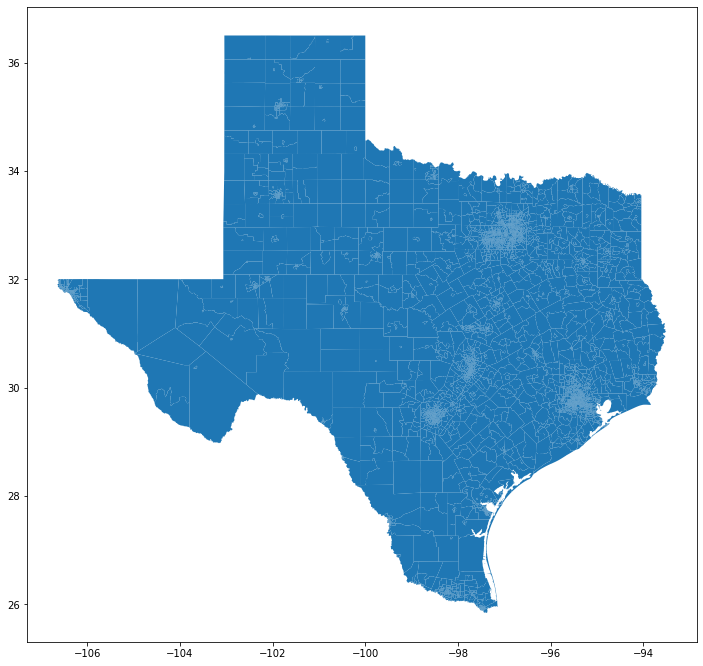

In [128]:
# Quick visual of the TX tracts
census_tract_shp.plot(figsize=(12,12))

In [129]:
# dissolve by the second column which is the county boundary, dissolve by first column is the state boundary
county_outline = census_tract_shp.dissolve(by=census_tract_shp.columns[1], aggfunc='first')

<AxesSubplot:>

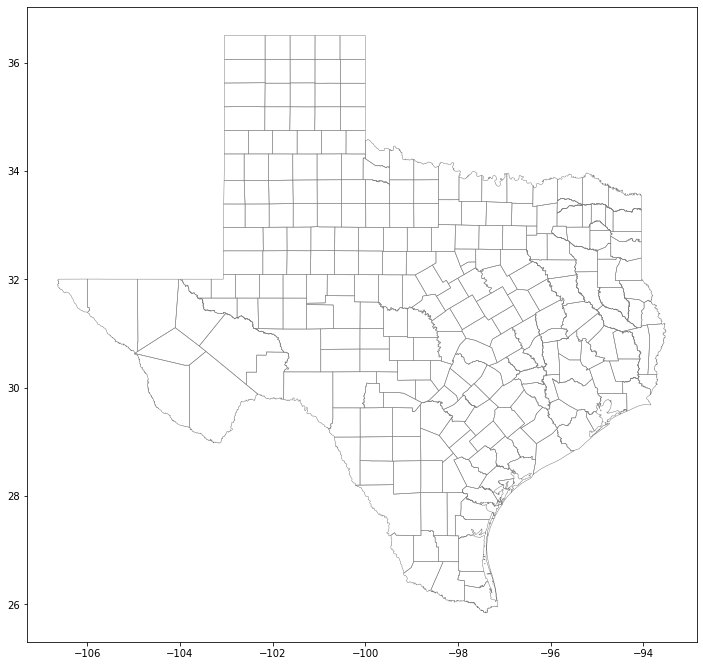

In [130]:
# Quick visual of the TX tracts
county_outline.plot(figsize=(12,12), facecolor='none', edgecolor='grey', linewidth=.5)

### Load demographics file

In [141]:
# Load the tract demographic data
censusTractDemographicsDf = pd.read_csv('../data/census-tract/census-tract-demographics.csv', 
                                        delimiter=',', encoding='utf-8')
# Filter for PR
censusTractDemographicsDf = censusTractDemographicsDf.loc[censusTractDemographicsDf.state == 'Texas']

/Users/nitinserro/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (49,52) have mixed types.Specify dtype option on import or set low_memory=False.



In [142]:
print('There are {} census tracts in the demographics'.format(len(censusTractDemographicsDf)))

There are 5265 census tracts in the demographics


In [133]:
# Add the GEOID (first 11 digits of the censusBlockId)
femaDf['GEOID'] = femaDf.censusBlockId.str[:11]

# Group Registrations by the GEOID, drop the null GEOIDs (2763 total)
registrationsDf = femaDf['GEOID'].value_counts(dropna=True).reset_index()
registrationsDf.rename(columns={'index': 'GEOID', 'GEOID': 'registrations'}, inplace=True)

# Make sure GEOID is type int64
registrationsDf['GEOID'] = registrationsDf['GEOID'].astype('int64')

# Merge the population per tract (exclude the demographic rows where total_population=0, 58 total)
registrationsByTractDf = pd.merge(
    registrationsDf, 
    censusTractDemographicsDf.loc[censusTractDemographicsDf['total_population'] > 0, ['tractid', 'total_population']],
    left_on='GEOID', right_on='tractid', how='inner')

# Exclude the rows where registrations > population!!
registrationsByTractDf = registrationsByTractDf.loc[registrationsByTractDf['total_population'] > registrationsByTractDf['registrations']]

# Calculate the registrations per capita
registrationsByTractDf['registration_rate'] = np.round(registrationsByTractDf['registrations']/registrationsByTractDf['total_population']*100,decimals=2)

registrationsByTractDf.head(20)

,GEOID,registrations,tractid,total_population,registration_rate
0,48157672900,5805,48157672900,47744,12.16
1,48007950100,4119,48007950100,5169,79.69
2,48007950500,4089,48007950500,6257,65.35
3,48201232301,3753,48201232301,10670,35.17
4,48039660602,3428,48039660602,40883,8.38
5,48167720600,3363,48167720600,13626,24.68
6,48201232302,3204,48201232302,11459,27.96
7,48007950300,3017,48007950300,7240,41.67
8,48157674502,2994,48157674502,19750,15.16
9,48245007001,2977,48245007001,7030,42.35


In [134]:
# Merge the shape files and registrations per capita rate by GEOID
# Left join so that we only keep the tracts corresponding to the shapefile tracts
census_tract_registrations_map = pd.merge(
    census_tract_shp, 
    registrationsByTractDf.loc[:, ['GEOID', 'registration_rate', 'total_population']], how='left', on='GEOID')

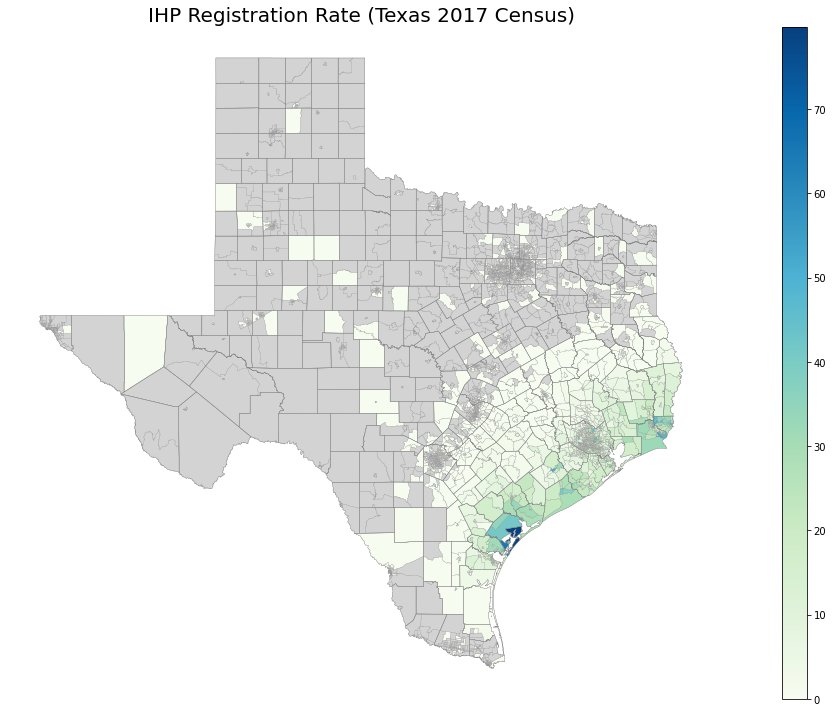

In [138]:
# https://geopandas.org/mapping.html

fig, ax = plt.subplots(figsize=(15, 10))

# Nice legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

# Plot the demographic and superimpose the county outline
# Highlight the missing datapoints in grey
# color scheme: https://matplotlib.org/tutorials/colors/colormaps.html
census_tract_registrations_map.plot(column='registration_rate', edgecolor='grey', linewidth=.2, 
                                    ax=ax, legend=True, cax=cax, cmap='GnBu', missing_kwds={'color': 'lightgrey'})
county_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.3)

# title and layout
ax.set_title('IHP Registration Rate (Texas 2017 Census)', fontsize=20)
ax.axis('off')
plt.tight_layout()

### Inspection Rates

In [207]:
# Group Registrations by the GEOID, drop the null GEOIDs (2763 total)
registrationsDf = femaDf['GEOID'].value_counts(dropna=True).reset_index()
registrationsDf.rename(columns={'index': 'GEOID', 'GEOID': 'registrations'}, inplace=True)
registrationsDf['GEOID'] = registrationsDf['GEOID'].astype('int64')

In [208]:
# Group inspections by the GEOID, drop the null GEOIDs (2763 total)
inspectionsDf = femaDf[femaDf['inspected'] == True].groupby(femaDf['GEOID']).size().reset_index()
inspectionsDf.rename(columns={0: 'inspections'}, inplace=True)
inspectionsDf['GEOID'] = inspectionsDf['GEOID'].astype('int64')

In [209]:
# Merge the dataframes
inspectionsByTractDf = pd.merge(registrationsDf, inspectionsDf, on='GEOID', how='left')
inspectionsByTractDf['inspections'].fillna(0)

# Calculate the inspection rate
inspectionsByTractDf['inspection_rate'] = np.round(inspectionsByTractDf['inspections']/inspectionsByTractDf['registrations']*100,decimals=2)

inspectionsByTractDf.head()

,GEOID,registrations,inspections,inspection_rate
0,48157672900,5805,3865.0,66.58
1,48007950100,4119,2639.0,64.07
2,48007950500,4089,3229.0,78.97
3,48201232301,3753,3097.0,82.52
4,48039660602,3428,1771.0,51.66


In [210]:
# Merge the shape files and registrations per capita rate by GEOID
# Left join so that we only keep the tracts corresponding to the shapefile tracts
census_tract_inspections_map = pd.merge(
    census_tract_shp, 
    inspectionsByTractDf.loc[:, ['GEOID', 'inspection_rate']], how='left', on='GEOID')

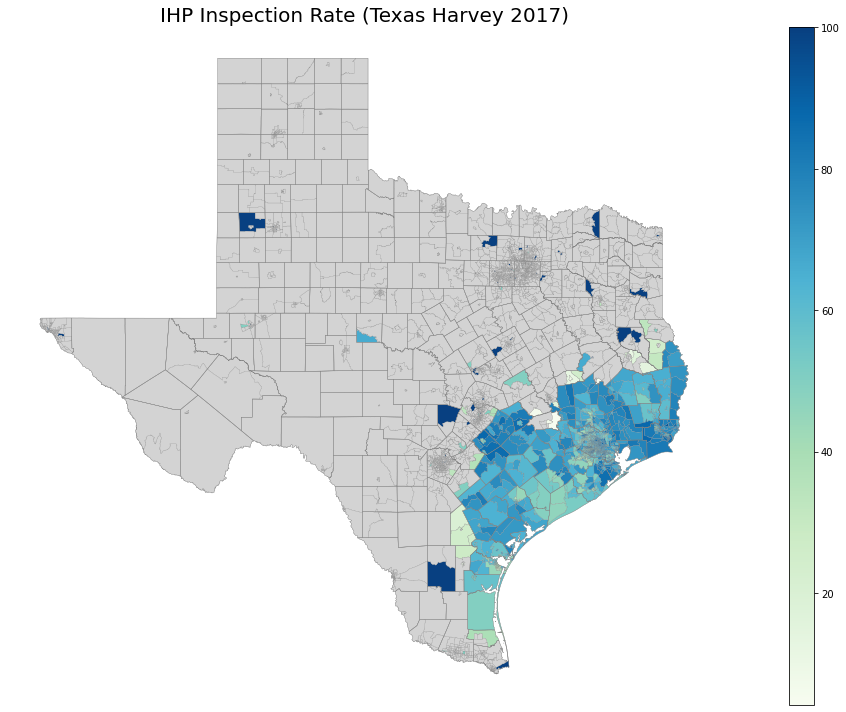

In [212]:
# https://geopandas.org/mapping.html

fig, ax = plt.subplots(figsize=(15, 10))

# Nice legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

# Plot the demographic and superimpose the county outline
# Highlight the missing datapoints in grey
# color scheme: https://matplotlib.org/tutorials/colors/colormaps.html
census_tract_inspections_map.plot(column='inspection_rate', edgecolor='grey', linewidth=.2, 
                                    ax=ax, legend=True, cax=cax, cmap='GnBu', missing_kwds={'color': 'lightgrey'})
county_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.3)

# title and layout
ax.set_title('IHP Inspection Rate (Texas Harvey 2017)', fontsize=20)
ax.axis('off')
plt.tight_layout()